In [1]:
# Add a node
# Link nodes via an edge
# Delete a node and related children
# Update a Node
# Update an Edge
# Delete an Edge

import networkx as nx

In [2]:
# %load_ext autoreload
# %autoreload 2

In [3]:
from syft.core.node.new.action_graph import Action, ActionGraph, ActionGraphNode, InMemoryGraphClient, UID
from syft.core.node.new.numpy import NumpyArrayObject
import numpy as np

kj/filesystem-disk-unix.c++:1703: warning: PWD environment variable doesn't match current directory; pwd = /home/shubham/PySyft


In [4]:
action_obj_a = NumpyArrayObject(syft_action_data=np.array([1, 2, 4]))
action_obj_b = NumpyArrayObject(syft_action_data=np.array([2, 4, 6]))

In [5]:
action_obj_a.syft_history_hash, action_obj_a.id

(945607933770593602, <UID: 9ef6e27c4309440cb5686585c4e5d4b5>)

In [6]:
action_a = action_obj_a.syft_make_method_action(op='init')
action_b = action_obj_b.syft_make_method_action(op='init')

In [7]:
action_a.remote_self.id, action_a.remote_self.syft_history_hash

(<UID: 9ef6e27c4309440cb5686585c4e5d4b5>, 945607933770593602)

In [8]:
action_a

```python
class Action:
  id: str = 7faf114505634068a141666647d3c7ae
  path: str = "NumpyArrayObject"
  op: str = "init"
  remote_self: str = 9ef6e27c4309440cb5686585c4e5d4b5
  args: str = []
  kwargs: str = {}
  result_id: str = 2cc802c548e14b1d8aca2c692094bd6b

```

In [9]:
action_c = action_obj_a.syft_make_method_action(op='add', args=[action_obj_b])

In [10]:
action_d = action_obj_a.syft_make_method_action(op='add', args=[action_obj_a, action_obj_b, action_obj_b])

In [11]:
# Z = A*B+C/D
# A1-> (A*B)->R1
# A2-> (C/D) -> R2
# A3 -> R1 + R2

In [12]:
action_c.syft_history_hash

-4505920463477672484

In [13]:
action_b

```python
class Action:
  id: str = 7889e19732d648b59b9374a216a4aceb
  path: str = "NumpyArrayObject"
  op: str = "init"
  remote_self: str = 9bcd6cb65d8744498822e7da9faeafe3
  args: str = []
  kwargs: str = {}
  result_id: str = 2111b4291e87409e9f0e7f038601cd44

```

In [14]:
action_c

```python
class Action:
  id: str = 79637950ecd449a3b9349b6246f6e2cf
  path: str = "NumpyArrayObject"
  op: str = "add"
  remote_self: str = 9ef6e27c4309440cb5686585c4e5d4b5
  args: str = [<LineageID: 9bcd6cb65d8744498822e7da9faeafe3 - 472400281253499478>]
  kwargs: str = {}
  result_id: str = 469f168c81bb42a1a517a0c453fe08de

```

In [15]:
action_graph = ActionGraph(node_uid=UID(), graph_client=InMemoryGraphClient)

ValueError: "InMemoryGraphClient" object has no field "graph"

In [39]:
action_graph.add_action(action_a)

In [40]:
action_graph.add_action(action_b)

In [41]:
action_graph.add_action(action_c)

In [42]:
action_c

```python
class Action:
  id: str = fd6022888d1b4051867870444d643d70
  path: str = "NumpyArrayObject"
  op: str = "add"
  remote_self: str = f7675b6f4a64485396a970a53457e5b1
  args: str = [<LineageID: e2ea60077dcd40c2bd218d18be9685c7 - 1473958372876258325>]
  kwargs: str = {}
  result_id: str = 2e32967e16c94160b6c5af4ac4088a79

```

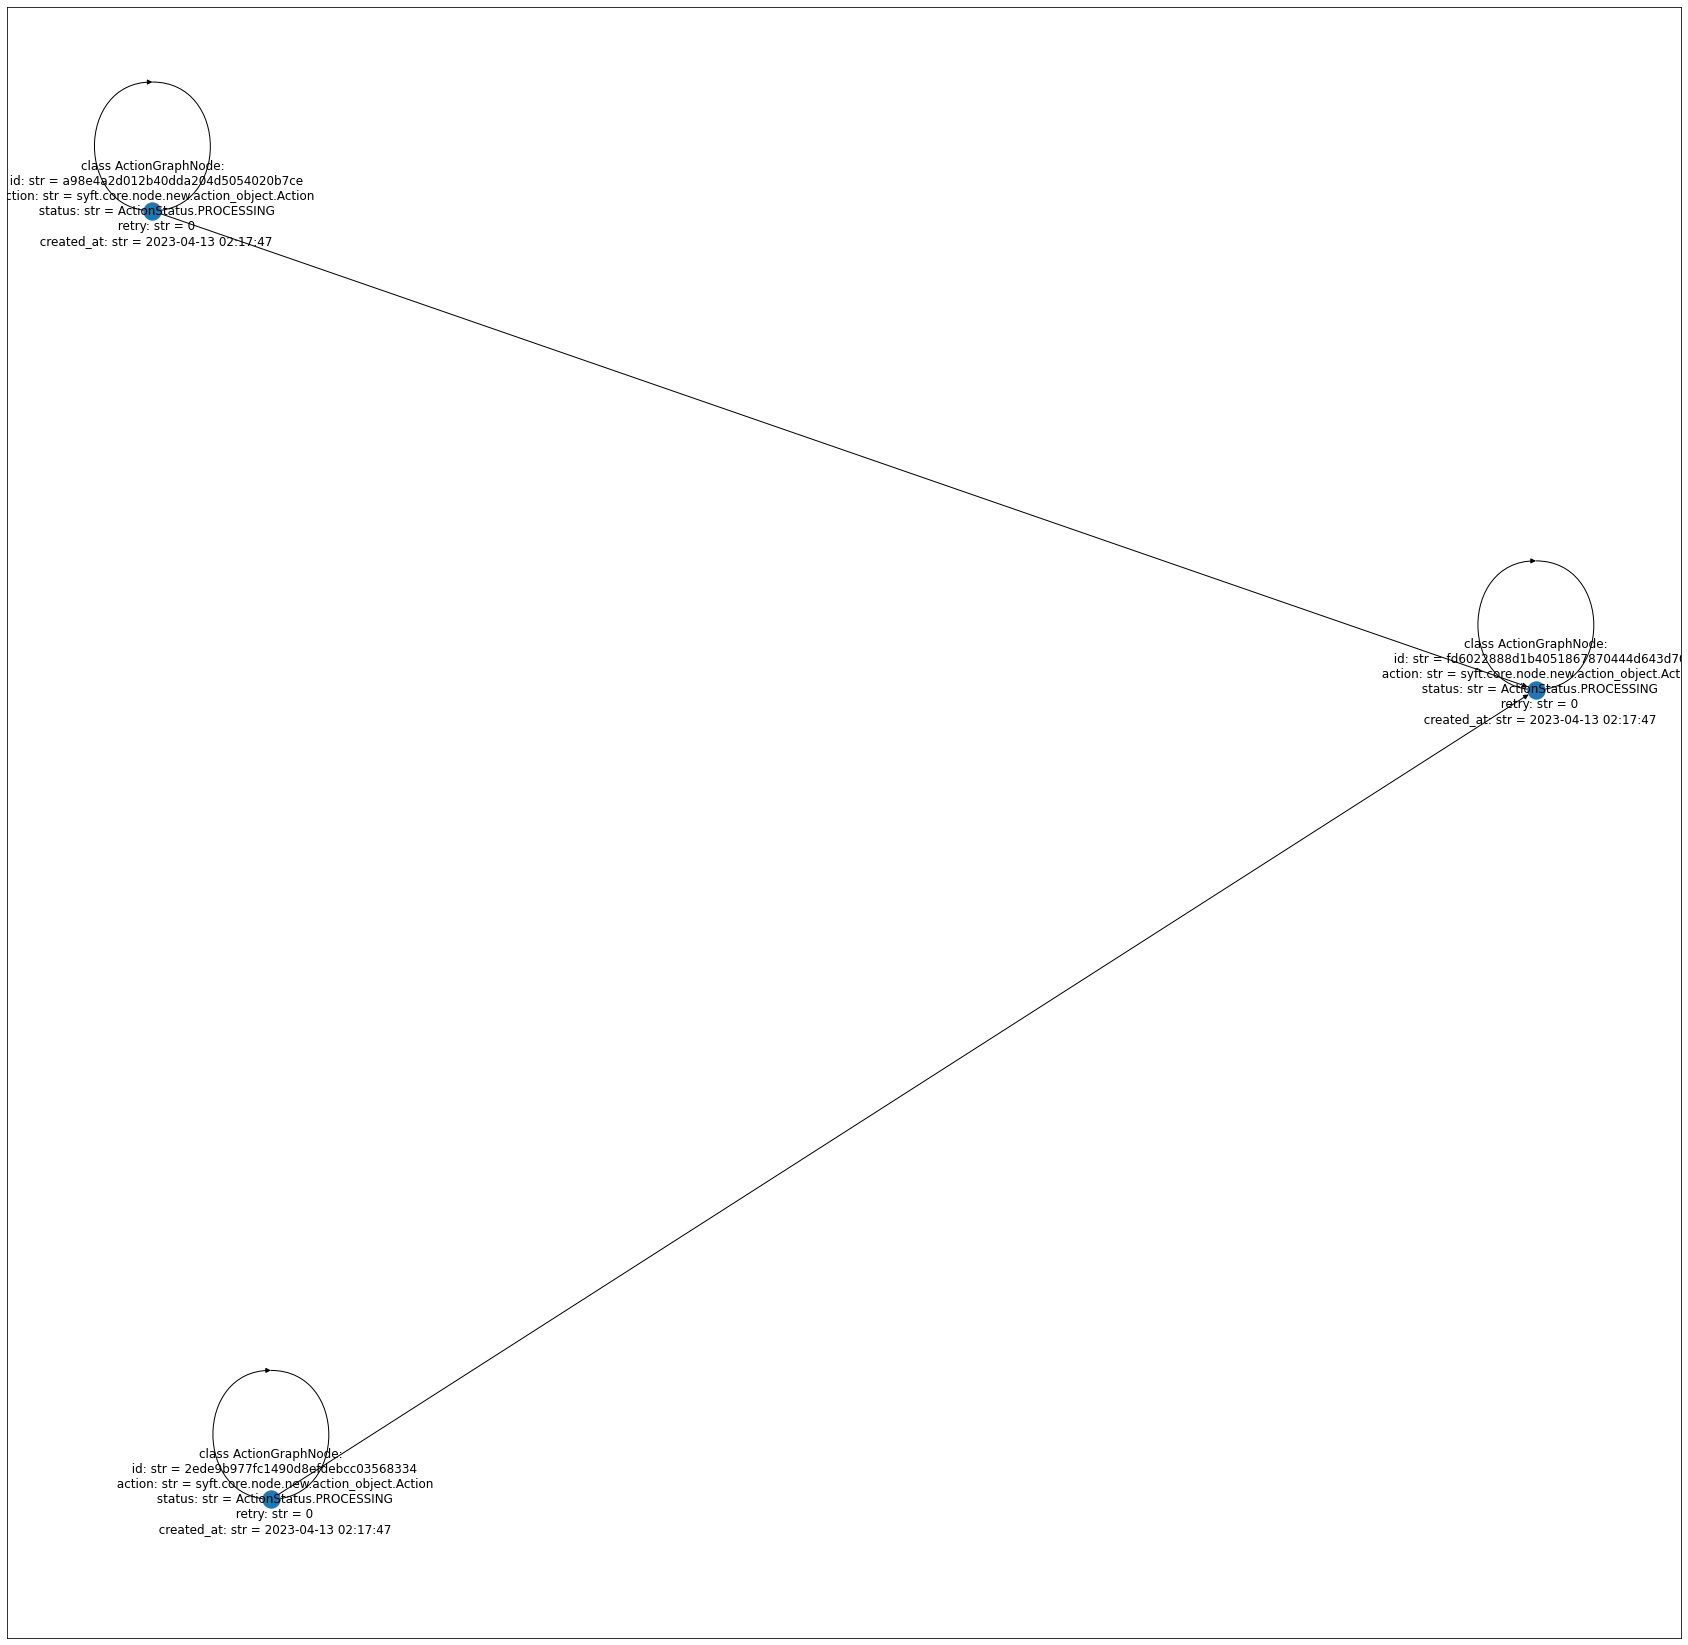

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 30))
action_graph.visualize()

In [59]:
n = list(action_graph.graph.client.nodes)[1]

In [50]:
n.id

<UID: 2ede9b977fc1490d8efdebcc03568334>

In [52]:
action_graph.graph.client.remove_node(n)

In [57]:
n

```python
class ActionGraphNode:
  id: str = 2ede9b977fc1490d8efdebcc03568334
  action: str = syft.core.node.new.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-13 02:17:47

```

In [70]:
action_graph.graph.client.update(nodes=[n])

In [71]:
action_graph.graph.client.nodes

NodeView((class ActionGraphNode:
  id: str = a98e4a2d012b40dda204d5054020b7ce
  action: str = syft.core.node.new.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-13 02:17:47
, class ActionGraphNode:
  id: str = fd6022888d1b4051867870444d643d70
  action: str = syft.core.node.new.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 10
  created_at: str = 2023-04-13 02:17:47
, 'id', <UID: 2ede9b977fc1490d8efdebcc03568334>, 'action', <UID: fd6022888d1b4051867870444d643d70>, ('id', <UID: fd6022888d1b4051867870444d643d70>), ('status', <ActionStatus.PROCESSING: 0>), ('retry', 0), 'created_at'))

In [7]:
class ActionGraph:
    def __init__(self):
        self.graph = nx.DiGraph()
        
    def add(self, node: ActionGraphObject):
        self.graph.add_node(node.id, data=node)
        
    def add_relationship(self, nodeA: ActionGraphObject, nodeB: ActionGraphObject):
        self.graph.add_edge(nodeA, nodeB)
        
    def remove_node(self, node: ActionGraphObject):
        self.graph.remove_node(node)
    
    def remove_edge(self, node: ActionGraphObject):
        self.graph.remove_edge(node)
        
    def neighbors_for(self, node: ActionGraphObject):
        return list(self.graph.neighbors(node))
        
    def visualize(self, arrows: bool = True):
        return nx.draw_networkx(self.graph)
        
    def remove_all_nodes_from(self, node: ActionGraphObject):
        all_adjacent_neighbors: list = []
            
        def find_adjacent_neighbors(node: ActionGraphObject, neighbors: set):           
            if not self.graph.neighbors(node):
                return 

            my_neighbors = self.graph.neighbors(node)
            for n in my_neighbors:
                if n not in neighbors:
                    neighbors.add(n)
                    self.find_adjacent_neighbors(n, neighbors)
                
        find_adjacent_neighbors(all_adjacent_neighbors)
        return all_adjacent_neighbors

In [8]:
graph = ActionGraph()

In [9]:
ago_a = ActionGraphObject.from_action_obj(action_obj_a)
ago_b = ActionGraphObject.from_action_obj(action_obj_b)

In [10]:
ago_ack = ActionGraphObject.from_action(action)

In [12]:
graph.add(ago_a)

In [13]:
graph.add(ago_b)

In [14]:
graph.add(ago_ack)

In [19]:
graph.add_relationship(ago_b.id, ago_ack.id)

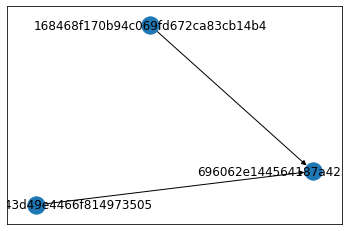

In [25]:
graph.visualize()

In [44]:
list(graph.graph.successors(ago_a.id))[0]

<UID: 696062e144564187a4259f09f794732f>

In [26]:
action

```python
class Action:
  id: str = 696062e144564187a4259f09f794732f
  path: str = "NumpyArrayObject"
  op: str = "add"
  remote_self: str = 1ac2ce6cefa643d49e4466f814973505
  args: str = [<LineageID: 168468f170b94c069fd672ca83cb14b4 - 1439386434612327662>]
  kwargs: str = {}
  result_id: str = ad175ed5e9a34079925976835513f916

```